In [1]:
!pip install pyautogen

  Using cached pyautogen-0.2.27-py3-none-any.whl (273 kB)
  Using cached tiktoken-0.6.0-cp310-cp310-win_amd64.whl (798 kB)
  Using cached python_dotenv-1.0.1-py3-none-any.whl (19 kB)
  Using cached pydantic-2.7.1-py3-none-any.whl (409 kB)
  Using cached FLAML-2.1.2-py3-none-any.whl (296 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl (7.7 kB)
  Using cached diskcache-5.6.3-py3-none-any.whl (45 kB)
  Using cached openai-1.28.1-py3-none-any.whl (320 kB)
  Using cached docker-7.0.0-py3-none-any.whl (147 kB)
  Using cached typing_extensions-4.11.0-py3-none-any.whl (34 kB)
  Using cached distro-1.9.0-py3-none-any.whl (20 kB)
  Using cached httpx-0.27.0-py3-none-any.whl (75 kB)
  Using cached pydantic_core-2.18.2-cp310-none-win_amd64.whl (1.9 MB)
  Using cached annotated_types-0.6.0-py3-none-any.whl (12 kB)
  Using cached httpcore-1.0.5-py3-none-any.whl (77 kB)
  Using cached h11-0.14.0-py3-none-any.whl (58 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: ty

In [2]:
import autogen

C:\Users\shikh\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [3]:
config_list=autogen.config_list_from_json(env_or_file="./OAI_CONFIG_LIST")

In [4]:
import io

from IPython.display import display
from PIL import Image

import autogen
from autogen.agentchat import AssistantAgent, UserProxyAgent
from autogen.agentchat.contrib.gpt_assistant_agent import GPTAssistantAgent

In [5]:
gpt_assistant = GPTAssistantAgent(
    name="Coder Assistant",
    llm_config={
        "config_list": config_list,
    },
    assistant_config={
        "tools": [{"type": "code_interpreter"}],
    },
    instructions="You are an expert at writing python code to solve problems. Reply TERMINATE when the task is solved and there is no problem.",
)

user_proxy = UserProxyAgent(
    name="user_proxy",
    is_termination_msg=lambda msg: "TERMINATE" in msg["content"],
    code_execution_config={
        "work_dir": "coding",
        "use_docker": False,  # Please set use_docker=True if docker is available to run the generated code. Using docker is safer than running the generated code directly.
    },
    human_input_mode="NEVER",
)

user_proxy.initiate_chat(
    gpt_assistant,
    message="Draw a line chart to show the population trend in US. Show how you solved it with code.",
    is_termination_msg=lambda msg: "TERMINATE" in msg["content"],
    human_input_mode="NEVER",
    clear_history=True,
    max_consecutive_auto_reply=1,
)

OpenAI client config of GPTAssistantAgent(Coder Assistant) - model: gpt-4-1106-preview
Matching assistant found, using the first matching assistant: {'id': 'asst_CcWz0nhj9SklFLnqj41TtQUk', 'created_at': 1715587049, 'description': None, 'instructions': 'You are an expert at writing python code to solve problems. Reply TERMINATE when the task is solved and there is no problem.', 'metadata': {}, 'model': 'gpt-4-1106-preview', 'name': 'Coder Assistant', 'object': 'assistant', 'tools': [CodeInterpreterTool(type='code_interpreter')], 'response_format': 'auto', 'temperature': 1.0, 'tool_resources': ToolResources(code_interpreter=ToolResourcesCodeInterpreter(file_ids=[]), file_search=None), 'top_p': 1.0}


user_proxy (to Coder Assistant):

Draw a line chart to show the population trend in US. Show how you solved it with code.

--------------------------------------------------------------------------------
Coder Assistant (to user_proxy):

To draw a line chart showing the population trend in the US, I would need historical population data for the United States. Normally, this data could be obtained from an official database or collected through an API. Since internet access is disabled in our current environment, we will need to use a sample dataset or generate synthetic data if actual data is not provided.

However, for illustration purposes, I will create a synthetic dataset to show you how to generate and plot a line chart showing the population trend. This data will not be accurate and is only for demonstration.

Let's proceed with generating synthetic population data for the past 10 years and plot a line chart using matplotlib, a Python plotting library.


Received file id=file-6j6B

ChatResult(chat_id=None, chat_history=[{'content': 'Draw a line chart to show the population trend in US. Show how you solved it with code.', 'role': 'assistant'}, {'content': "To draw a line chart showing the population trend in the US, I would need historical population data for the United States. Normally, this data could be obtained from an official database or collected through an API. Since internet access is disabled in our current environment, we will need to use a sample dataset or generate synthetic data if actual data is not provided.\n\nHowever, for illustration purposes, I will create a synthetic dataset to show you how to generate and plot a line chart showing the population trend. This data will not be accurate and is only for demonstration.\n\nLet's proceed with generating synthetic population data for the past 10 years and plot a line chart using matplotlib, a Python plotting library.\n\n\nReceived file id=file-6j6B7N7GpMF5iEBiwpz2jSER\n\nHere is the line chart that il

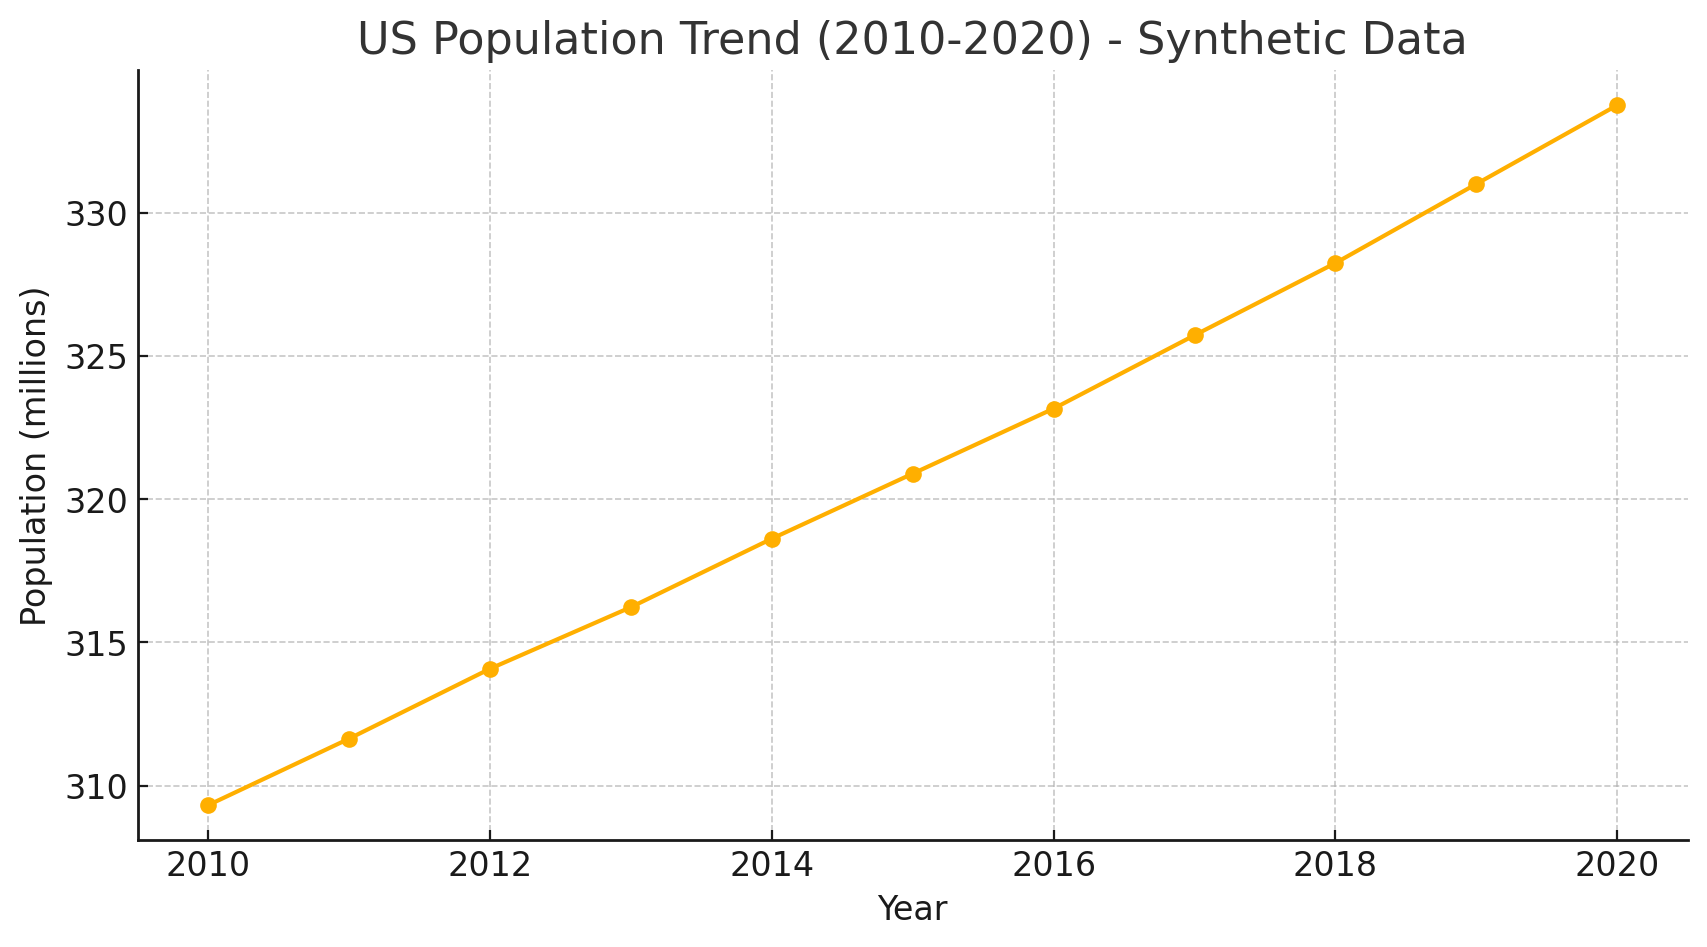

In [6]:
api_response = gpt_assistant.openai_client.files.with_raw_response.retrieve_content(
    "file-6j6B7N7GpMF5iEBiwpz2jSER"
)

if api_response.status_code == 200:
    content = api_response.content
    image_data_bytes = io.BytesIO(content)
    image = Image.open(image_data_bytes)
    display(image)